# Implementation of the PCA and KMeans
Here below there are the basic implementations of KMeans and PCA Analysis. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

class PCA(object):
    def __init__(self, data):
        self.data = data
    
    def _normalize(self, data):
        
        mean = np.mean(self.data, axis=0)
        return (mean - self.data) 
    
    def _explained_variance(self, eigen_val, eigen_vec):
        
        sum_eigen_val = np.sum(eigen_val)
        explained_variance = eigen_val/sum_eigen_val
        cumulative_variance = np.cumsum(explained_variance)
        return explained_variance, cumulative_variance    
        
    def _fit(self):
        
        standardized_data = self._normalize(self.data)
        covariance_matrix = np.cov(standardized_data.T).round(2)
        eigen_val, eigen_vec = np.linalg.eig(covariance_matrix)

        indices = ([x for _,x in sorted(zip(eigen_val, np.arange(0,len(eigen_val))))])[::-1]
        eigen_val = eigen_val[indices]
        eigen_vec = eigen_vec[:,indices]
        
        explained_variance, cumulative_variance = self._explained_variance(eigen_val=eigen_val,eigen_vec=eigen_vec)
        
        eigenvector_subset = eigen_vec[:,0:2]
        reduced_data = np.dot(eigenvector_subset.T,standardized_data.T).T
        
        return reduced_data, explained_variance, cumulative_variance
      
class KMeans(object):
    def __init__(self, n_clusters, centroids=None, seed=1):
        np.random.seed(seed)
        self.n_clusters=n_clusters
        self.centroids=centroids
        self.random_gen=np.random.choice
        self.cls_labels = None
    
    def _euclidean (self, x, y):
        return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
    
    def _pick_random_centroids(self, X):
        
        clusters = np.zeros((self.n_clusters, 2))
        for i in range(self.n_clusters):
          clusters[i] = (X[self.random_gen(len(X))])
    
        return clusters
    
    def _plot_clustering(self, X, it, cls_labels):
  
        plt.scatter(X[:,0],X[:,1], c=cls_labels)
        plt.title("Iteration: "+str(it))
        plt.show()
    
    def fit(self, X, max_iteration=100, visualize=False):
      
      df = pd.DataFrame(index=range(len(X)),columns=range(self.n_clusters))
      self.centroids = self._pick_random_centroids(X)      
      new_centroids = np.zeros((self.n_clusters,2))
      self.cls_labels = np.zeros(len(X))
      it = 1
    
      while(np.array_equal(new_centroids,self.centroids) == False):
        clusters = [[] for i in range(len(self.centroids))]

        for i in range(len(X)):
          for j in range(len(self.centroids)):
            df[j][i] = KMeans._euclidean(KMeans(self.n_clusters), X[i], self.centroids[j])
        
        for i in range(df.T.shape[1]):
          filter = df.T[i]==min(df.T[i])
          for j in range(len(filter)):
            if(filter[j] == True):
              self.cls_labels[i] = j
              clusters[j].append(X[i])
        
        for i in range(len(clusters)):
          new_centroids[i] = np.mean(clusters[i], axis = 0)
        
        self._plot_clustering(X, it = it, cls_labels=self.cls_labels)
        clusters = [[] for i in range(len(self.centroids))]
        it = it + 1

        for i in range(len(X)):
          for j in range(len(new_centroids)):
            df[j][i] = KMeans._euclidean(KMeans(self.n_clusters), X[i], new_centroids[j])
        
        for i in range(df.T.shape[1]):
          filter = df.T[i]==min(df.T[i])
          for j in range(len(filter)):
            if(filter[j] == True):
              self.cls_labels[i] = j
              clusters[j].append(X[i])
        
        for i in range(len(self.centroids)):
          self.centroids[i] = np.mean(clusters[i], axis = 0)
        
        self._plot_clustering(X, it = it, cls_labels=self.cls_labels)
        it = it + 1
    
          
        
        
        

In [2]:
data = np.loadtxt('wine-clustering.csv', skiprows=1, delimiter=',')
mm = MinMaxScaler()
mm_scale = mm.fit(data)
data_mm = mm_scale.transform(data)

reduced_data, explained_variance, cumulative_variance = PCA._fit(PCA(data=data))

 * First try it out without the scaling. The PCA cumulative variance matrix, which can be seen that even with one variable the whole data can be explained 99%. But in order to obtain the coordinate distances first two variables are obtained.

[0.99809121 0.99982713 0.9999221  0.99997225 0.9999846  0.9999931
 0.99999593 0.99999746 0.99999855 0.99999926 0.99999971 0.99999989
 1.        ]


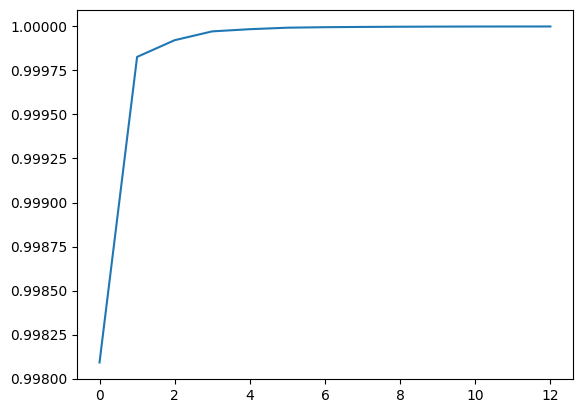

In [3]:
plt.plot(cumulative_variance)
print(cumulative_variance)

* The data before the PCA 

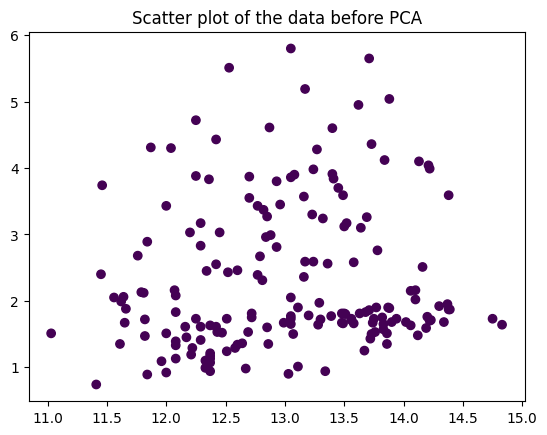

In [4]:
plt.scatter(data[:,0],data[:,1], c=np.ones(len(data)))
plt.title("Scatter plot of the data before PCA")
plt.show()

* The data after the PCA. We can observe that the data is not distinguished from each other. Clusters cannot be observed easily by reading the plot.

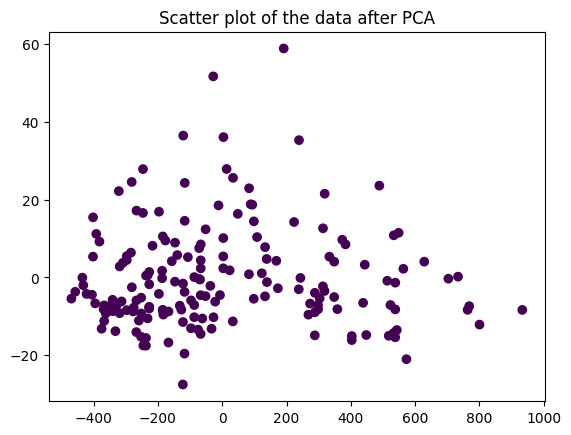

In [5]:
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=np.ones(len(reduced_data)))
plt.title("Scatter plot of the data after PCA")
plt.show()

* In this part, each step of the distance algorithm can be observed.

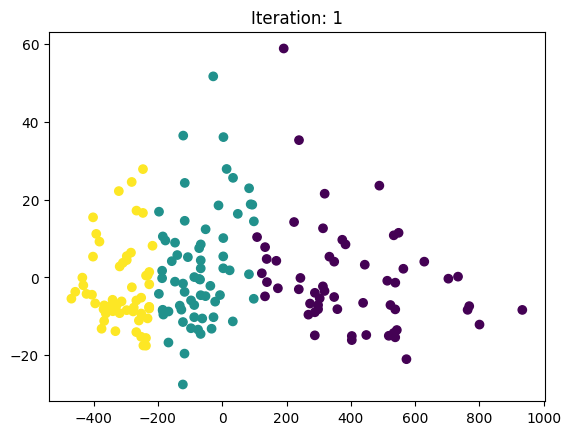

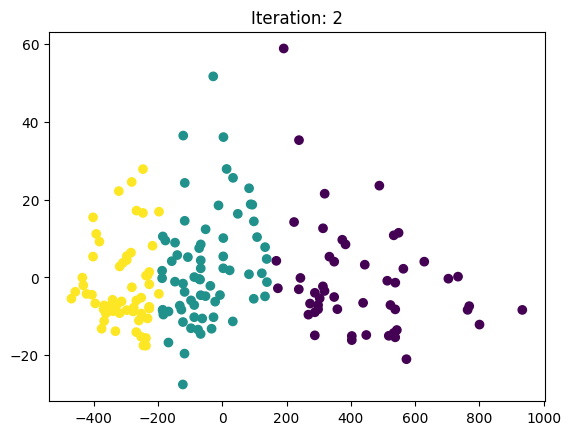

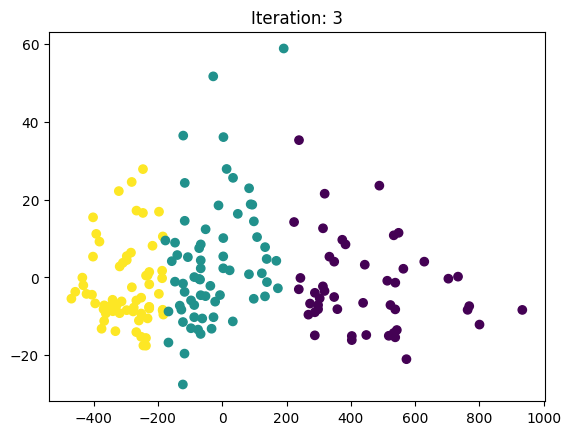

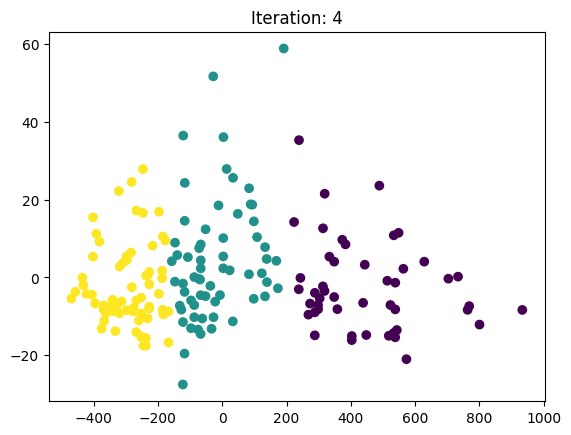

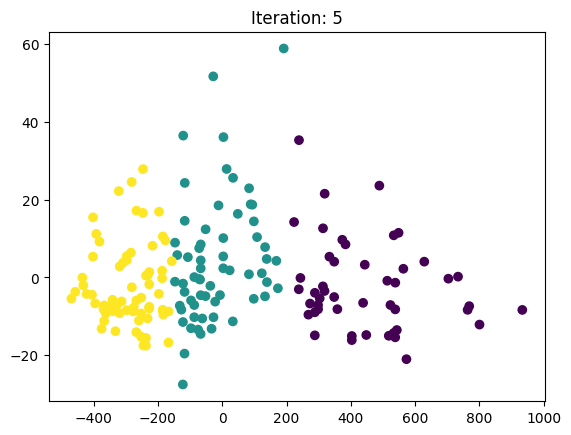

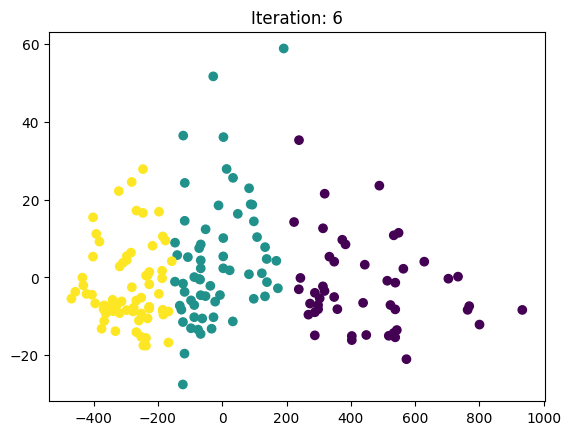

In [6]:
KMeans.fit(KMeans(3), reduced_data)

* This step is for comparing the implementation with the libraries that are in used. As can be seen, there are no difference between the plots, the accuracy nor the PCA results. Also, the 3 clustered non scaled data has 0.57 silhoutte coefficient.

S C:  0.5722554773930956
CHI:  562.5187541342635
DBI:  0.5329685869905175


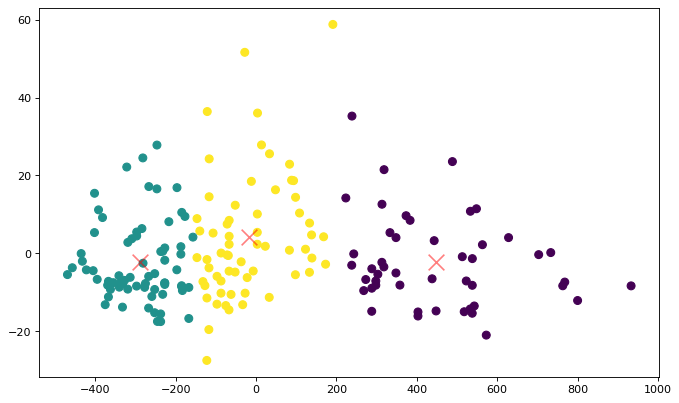

318.5629797021102
318.56297928793686
303.09741990918155
303.0974196593862
-5.364907501605895
-5.364717683064027


In [7]:
from sklearn.cluster import KMeans as km
import sklearn.metrics as metrics

kmeans = km(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1)
kmeans.fit(reduced_data)

y = kmeans.fit_predict(reduced_data)
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
labels = kmeans.labels_
score = metrics.silhouette_score(reduced_data, labels, metric="euclidean")
score1 = metrics.calinski_harabasz_score(reduced_data, labels)
score2 = metrics.davies_bouldin_score(reduced_data, labels)
print("S C: ", score)
print("CHI: ", score1)
print("DBI: ", score2)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.5)
plt.show()

from sklearn.decomposition import PCA as p
pca = p()
components = p.fit_transform(pca,data)

print(reduced_data[0][0])
print(components[0][0])

print(reduced_data[1][0])
print(components[1][0])

print(reduced_data[1][1])
print(components[1][1])


### Now let's try for the scaled version data
* As we can observe, 2 variables here only represents the almost 60% of our data. Let's go on.

[0.40444372 0.59167944 0.68340762 0.76127361 0.82672483 0.87632717
 0.91603401 0.95028712 0.97779809 0.99034365 0.99845769 1.00139933
 1.        ]


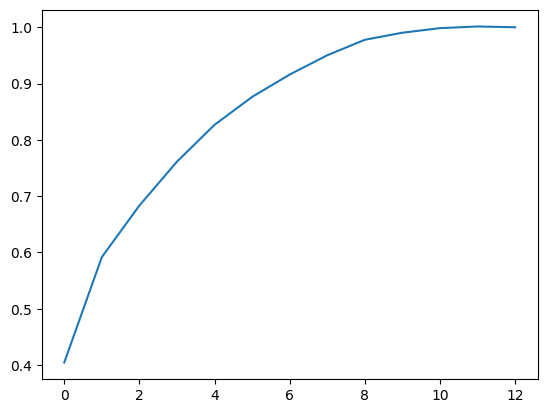

In [8]:
reduced_data, explained_variance, cumulative_variance = PCA._fit(PCA(data=data_mm))
plt.plot(cumulative_variance)
print(cumulative_variance)

## Now let's make the scatter plot comparison between the Scatter Plots of before and after PCA Analaysis
* We can clearly observe the clusters right now in the after PCA scatter plot. Let's go on.

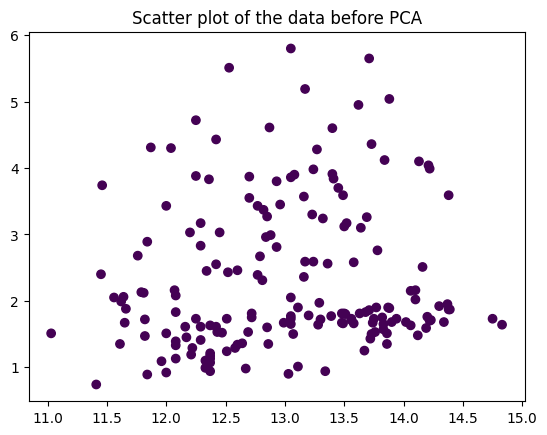

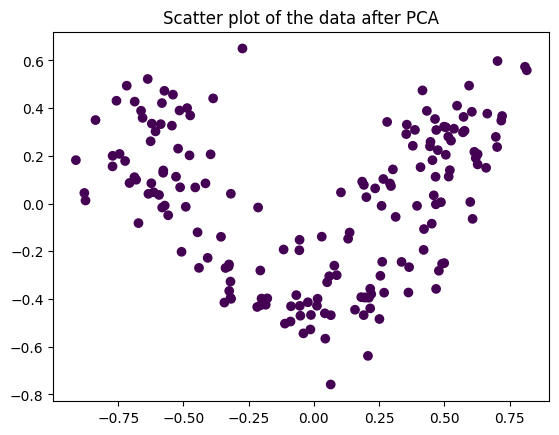

In [9]:
plt.scatter(data[:,0],data[:,1], c=np.ones(len(data)))
plt.title("Scatter plot of the data before PCA")
plt.show()

plt.scatter(reduced_data[:,0],reduced_data[:,1], c=np.ones(len(reduced_data)))
plt.title("Scatter plot of the data after PCA")
plt.show()

* Now we can see the difference between clusters better than the first example.

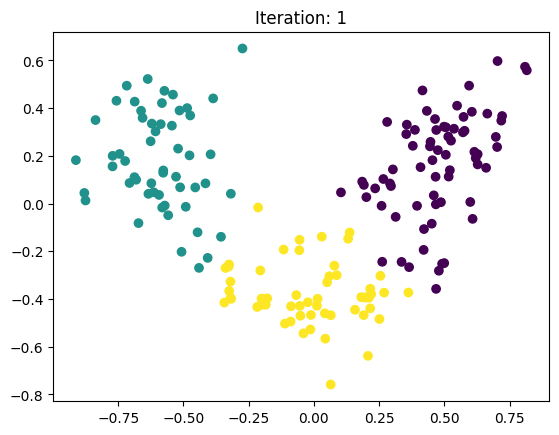

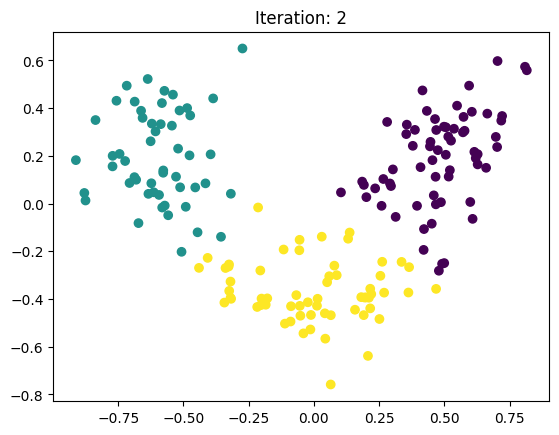

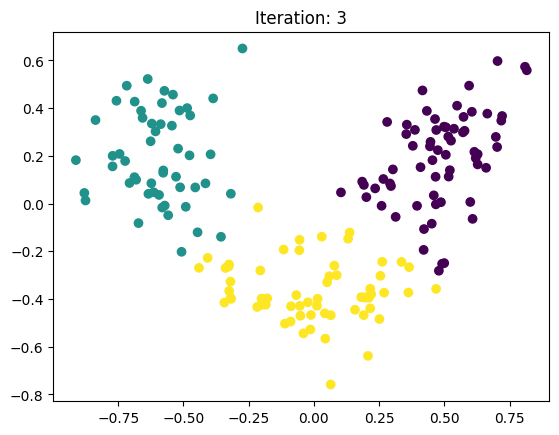

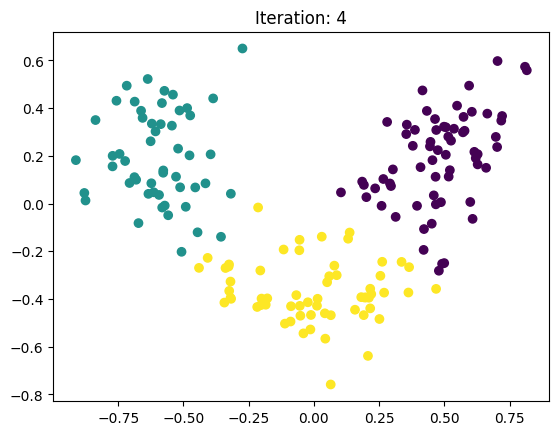

In [10]:
KMeans.fit(KMeans(3), reduced_data)

## Let's check for the accuracy of our implementation again.

S C:  0.564753275477912
CHI:  371.4082131916589
DBI:  0.5891156609193784


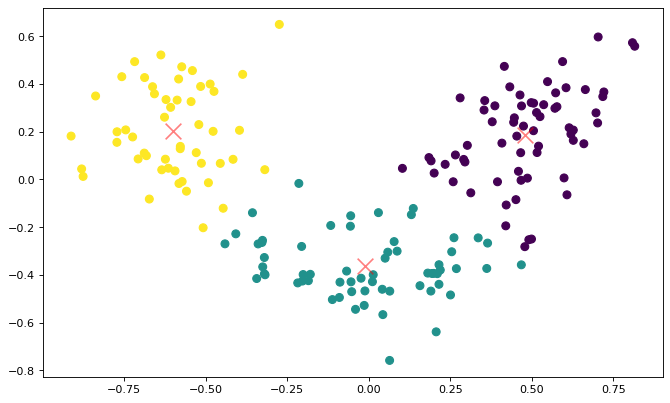

0.6971892834768318
318.56297928793686
0.48685159841547354
303.0974196593862
0.005698394583584143
-5.364717683064027


In [11]:
from sklearn.cluster import KMeans as km
import sklearn.metrics as metrics

kmeans = km(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1)
kmeans.fit(reduced_data)

y = kmeans.fit_predict(reduced_data)
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
labels = kmeans.labels_
score = metrics.silhouette_score(reduced_data, labels, metric="euclidean")
score1 = metrics.calinski_harabasz_score(reduced_data, labels)
score2 = metrics.davies_bouldin_score(reduced_data, labels)
print("S C: ", score)
print("CHI: ", score1)
print("DBI: ", score2)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.5)
plt.show()

from sklearn.decomposition import PCA as p
pca = p()
components = p.fit_transform(pca,data)

print(reduced_data[0][0])
print(components[0][0])

print(reduced_data[1][0])
print(components[1][0])

print(reduced_data[1][1])
print(components[1][1])


### Interestingly, the silhoutte coefficients, chi and dbi coefficients resulted better in the without scale part. The reason behind it might be about the explainibility of our variances. Also, despite being an obvious cut between the clusters, the k-means algorithm is not resistent to the outliers. Hence, the outliers of each cluster causes the merging problem of the clusters.

Thank you for reading. Waiting for the feedbacks. Good luck!